<font size=6 color=red>__Part1__</font>

In [1]:
import array as arr
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

df = pd.read_csv('winequality-white.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    4898 non-null object
dtypes: object(1)
memory usage: 38.3+ KB


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [2]:
df.columns[0]

'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [3]:
df = df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(';', 12, expand=True)
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null object
volatile acidity        4898 non-null object
citric acid             4898 non-null object
residual sugar          4898 non-null object
chlorides               4898 non-null object
free sulfur dioxide     4898 non-null object
total sulfur dioxide    4898 non-null object
density                 4898 non-null object
pH                      4898 non-null object
sulphates               4898 non-null object
alcohol                 4898 non-null object
quality                 4898 non-null object
dtypes: object(12)
memory usage: 459.3+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [4]:
target = df['quality'].values
target = target.astype(np.int)
#X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
X = df.drop(columns = 'quality')
X = X.to_numpy().astype(float)
y = (target > 5).astype(int)
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


<font size=6 color=blue>__Question 4__</font>

In [5]:
#summary of variables
print("The mean of each feature is:\n")
print(X.mean(axis=0))
print("\nThe standard deviation for each feature is:\n")
print(np.std(X, axis=0))
print("\nThe quatiles for each feature is:\n")
print(np.percentile(X, 25, axis=0))
print("\nThe mean of the target is:\n")
print(target.mean(axis=0))
print("\nThe standard deviation of the target is:\n")
print(np.std(target, axis=0))
print("\nThe quartiles of the target is:\n")
print(np.percentile(target, 25, axis=0))

The mean of each feature is:

[6.85478767e+00 2.78241119e-01 3.34191507e-01 6.39141486e+00
 4.57723561e-02 3.53080849e+01 1.38360657e+02 9.94027376e-01
 3.18826664e+00 4.89846876e-01 1.05142670e+01]

The standard deviation for each feature is:

[8.43782079e-01 1.00784259e-01 1.21007450e-01 5.07153999e+00
 2.18457377e-02 1.70054011e+01 4.24937260e+01 2.99060158e-03
 1.50985184e-01 1.14114183e-01 1.23049494e+00]

The quatiles for each feature is:

[6.300000e+00 2.100000e-01 2.700000e-01 1.700000e+00 3.600000e-02
 2.300000e+01 1.080000e+02 9.917225e-01 3.090000e+00 4.100000e-01
 9.500000e+00]

The mean of the target is:

5.87790935075541

The standard deviation of the target is:

0.8855481621683543

The quartiles of the target is:

5.0


<font size=6 color=blue>__Question 6__</font>

In [6]:
#Identify redundant features by standard deviation:
#volatile acidity, citric acid, sulphates, alcohol
#chlorides, free sulfur dioxide, density, pH

print("The dropped features are:\n\nvolatile acidity, citric acid, sulphates, alcohol, chlorides, free sulfur dioxide, density, pH")

The dropped features are:

volatile acidity, citric acid, sulphates, alcohol, chlorides, free sulfur dioxide, density, pH


<font size=6 color=blue>__Question 7__</font>

In [7]:
df_new = df.drop(columns = {'volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'chlorides', 'free sulfur dioxide', 'density', 'pH'})
df_new.head()

#after dropping features: X_new
X_new = df_new.drop(columns = 'quality')
X_new = X_new.to_numpy().astype(float)
print(X_new.shape)
print('\n')
print(X_new)

(4898, 3)


[[  7.   20.7 170. ]
 [  6.3   1.6 132. ]
 [  8.1   6.9  97. ]
 ...
 [  6.5   1.2 111. ]
 [  5.5   1.1 110. ]
 [  6.    0.8  98. ]]


<font size=6 color=blue>__Question 8__</font>

In [8]:
#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("\nInformation on train and test data:\n")
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)
print("\n")
print("Information on train and test data after dropping fearures:\n")
#split into training and testing data adter dropping features
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)
print('X_new_train: ', X_new_train.shape)
print('X_new_test: ', X_new_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)


Information on train and test data:

X_train:  (3918, 11)
X_test:  (980, 11)
y_train:  (3918,)
y_test:  (980,)


Information on train and test data after dropping fearures:

X_new_train:  (3918, 3)
X_new_test:  (980, 3)
y_train shape:  (3918,)
y_test shape:  (980,)


<font size=6 color=blue>__Question 9__</font>

In [9]:
#Standardize features
X = scale(X)
print(X)

print("\n")
#Standardize features on X_new
X_new = scale(X_new)
print(X_new)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


[[ 0.17209696  2.82134917  0.74456503]
 [-0.65750113 -0.94476527 -0.14968462]
 [ 1.4757511   0.10028219 -0.97333563]
 ...
 [-0.4204731  -1.02363678 -0.64387523]
 [-1.60561323 -1.04335466 -0.66740811]
 [-1.01304317 -1.10250829 -0.94980274]]


<font size=6 color=red>__Part 2__</font>

<font size=6 color=blue>__Question 10 (including comparing performance between full features and dataset with dropped features)__</font>

In [10]:
%%time
#Model Selection
warnings.filterwarnings('ignore')

param_grid = {'n_neighbors': [1, 5, 9, 33, 37], 'p': [1, 2, 10, 100], 'weights': ["uniform", "distance"]}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring = 'f1', cv = 10)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" %knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Best Score: 0.852494
Optimal Hyperparameter Values:  {'n_neighbors': 33, 'p': 1, 'weights': 'distance'}


CPU times: user 7.62 s, sys: 41.5 ms, total: 7.66 s
Wall time: 7.7 s


In [11]:
%%time
#Model Selection on X_new
warnings.filterwarnings('ignore')

param_grid = {'n_neighbors': [1, 5, 9, 33, 37], 'p': [1, 2, 10, 100], 'weights': ["uniform", "distance"]}
knn = KNeighborsClassifier()

knn_cv_new = GridSearchCV(knn, param_grid, scoring = 'f1', cv = 10)
knn_cv_new.fit(X_new_train, y_train)

params_optimal_knn_new = knn_cv_new.best_params_

print("Best Score: %f" %knn_cv_new.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_new)
print("\n")

Best Score: 0.844364
Optimal Hyperparameter Values:  {'n_neighbors': 37, 'p': 2, 'weights': 'distance'}


CPU times: user 4.03 s, sys: 17.6 ms, total: 4.04 s
Wall time: 4.05 s


<font size=6 color=blue>__Question 11__</font>

In [12]:
#Keep the original features because F1 does not increase
#Train KNeighborsClassifier model
knn = KNeighborsClassifier(**params_optimal_knn)
knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("Training Accuracy: ", train_accuracy_knn)

Training Accuracy:  1.0


<font size=6 color=blue>__Question 12__</font>

In [13]:
#Evaluation
scores = cross_val_score(knn, X_train, y_train, scoring = 'f1', cv = 10)
print(scores)
print("F1 Score: %.2f (+/- %.2f)" % (scores.mean(), scores.std()*2))

[0.84827586 0.84763573 0.86206897 0.86212914 0.8312611  0.84805654
 0.84397163 0.87873462 0.8466899  0.85614035]
F1 Score: 0.85 (+/- 0.02)


<font size=6 color=blue>__Question 13__</font>

In [14]:
#Performance Measure
y_train_pred = cross_val_predict(knn, X_train, y_train, cv = 10)

precision = precision_score(y_train, y_train_pred)
print("Precision = %f" %precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" %recall)

f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" %f1)

confusion_matrix(y_train, y_train_pred)

Precision = 0.791030
Recall = 0.924421
F1 Score = 0.852539


array([[ 642,  643],
       [ 199, 2434]])

<font size=6 color=blue>__Question 14__</font>

In [15]:
# ROC Curve with FPR&TPR
y_scores = cross_val_predict(knn, X_train, y_train, method='predict_proba', cv = 10)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR & TPR for Various Threshold Values:")
print("FPR: ", fpr)
print("TPR: ", tpr)
print("Thresholds: ", thresholds)


FPR & TPR for Various Threshold Values:
FPR:  [0.         0.00233463 0.00233463 ... 0.72217899 0.74396887 1.        ]
TPR:  [0.         0.29965818 0.30231675 ... 1.         1.         1.        ]
Thresholds:  [2.         1.         0.98187904 ... 0.23310419 0.06750495 0.        ]


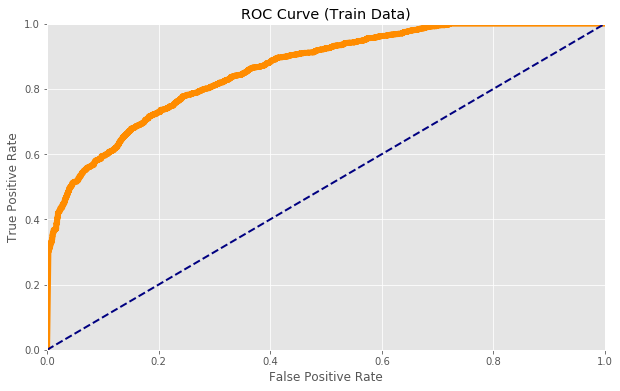

In [16]:
#Plotting ROC
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, color='darkorange', linewidth=6, label=label)
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

<font size=6 color=blue>__Question 15__</font>

In [17]:
#Area Under The ROC Curve
print('The area under the curve is:')
roc_auc_score(y_train, y_scores)

The area under the curve is:


0.8598744460092718

<font size=6 color=blue>__Question 16__</font>

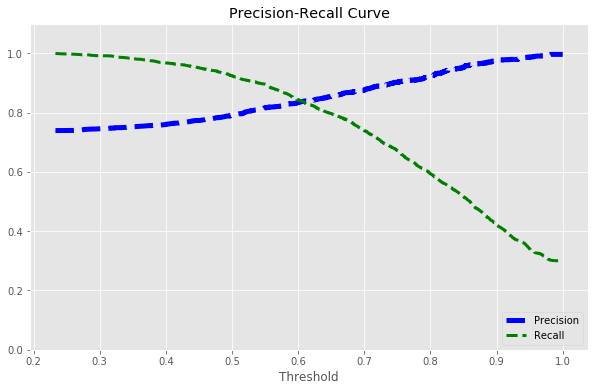

In [18]:
#Precision-recall Curve
plt.style.use('ggplot')

y_scores = cross_val_predict(knn, X_train, y_train, method='predict_proba', cv=10)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], 'b--', linewidth=5, label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g--', linewidth=3, label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower right')
    plt.title('Precision-Recall Curve')
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [19]:
#Find optimal Threshold
threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print('\nThe optimal threshold for the training data is %f' %threshold_optimal)


The optimal threshold for the training data is 0.606669


<font size=6 color=blue>__Question 17__</font>

In [20]:
#Evaluation on test data and performance of the model
print('Performance Measures Based on the Default Threshold:\n')
y_train_pred = cross_val_predict(knn ,X_train, y_train, cv=10)

precision_train = precision_score(y_train, y_train_pred)
print('Precision (Default Threshold 0.5) = %f' %precision_train)

recall_train = recall_score(y_train, y_train_pred)
print('Recall (Default Threshold 0.5) = %f' %recall_train)

f1_train = f1_score(y_train, y_train_pred)
print('F1 (Default Threshold 0.5) = %f' %f1_train)

print('Confusion Matrix (Default Threshold 0.5)\n', confusion_matrix(y_train, y_train_pred))

print('\n------------------------------------------------------------\n')

print('Performance Measures Based on a New Threshold:')

t = 0.606669

y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method='predict_proba', cv=10)[:, 1] > t).astype(int)

precision = precision_score(y_train, y_train_predicted_new)
print('Precision (Threshold %.2f) = %f' %(t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print('Recall (Threshold %.2f) = %f' %(t, recall))

f1 = f1_score(y_train, y_train_predicted_new)
print('F1 Score (Threshold %.2f) = %f' %(t, f1))

print('Confusion Matrix (Threshold %.2f)' %t)
print(confusion_matrix(y_train, y_train_predicted_new))

Performance Measures Based on the Default Threshold:

Precision (Default Threshold 0.5) = 0.791030
Recall (Default Threshold 0.5) = 0.924421
F1 (Default Threshold 0.5) = 0.852539
Confusion Matrix (Default Threshold 0.5)
 [[ 642  643]
 [ 199 2434]]

------------------------------------------------------------

Performance Measures Based on a New Threshold:
Precision (Threshold 0.61) = 0.837448
Recall (Threshold 0.61) = 0.837448
F1 Score (Threshold 0.61) = 0.837448
Confusion Matrix (Threshold 0.61)
[[ 857  428]
 [ 428 2205]]


In [21]:
#Determine Accuracy

test_accuracy_knn = knn.score(X_test, y_test)
print('\nTest Accuracy: ', test_accuracy_knn)

y_test_predicted = knn.predict(X_test)
print('\nNo. of correct predictions (Test): %d/%d' %(np.sum(y_test_predicted == y_test), len(y_test)))

print('\nConfusion Matrix (Test Data):\n', confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.75

No. of correct predictions (Test): 735/980

Confusion Matrix (Test Data):
 [[177 178]
 [ 67 558]]
